In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [45]:
td = tf.constant([[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]])
learning_rate = 0.01
training_epochs = 1000
display_step = 50
train_X = []
train_Y = []

n = tf.to_float(tf.count_nonzero(td)/2)

In [46]:
with tf.Session() as sess:
    for i in range(sess.run(n)):
        train_X.append(td[i][0])
        train_Y.append(td[i][1])
    print(sess.run(train_Y))
    print(sess.run(train_Y))

[1, 3, 3, 2, 5]
[1, 3, 3, 2, 5]


In [47]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W= tf.Variable(tf.random_uniform([5], 0, 10, dtype=tf.float32, seed=0))
b= tf.Variable(tf.random_uniform([5], 0, 10, dtype=tf.float32, seed=0))

In [48]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [49]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [50]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.434368134 W= [ 0.67450523 -0.76311493 -0.56234425  0.76146215  0.76106232] b= [ 0.86959982  6.22544289  5.47747374  0.54564255  0.54713166]
Epoch: 0100 cost= 0.342385501 W= [ 0.68436414 -0.65866661 -0.47110593  0.76559973  0.76522595] b= [ 0.83025837  5.74273443  5.05668354  0.53311855  0.53448486]
Epoch: 0150 cost= 0.287668467 W= [ 0.69418234 -0.53931332 -0.3670494   0.76879233  0.76844931] b= [ 0.79433942  5.3059473   4.67587852  0.5214476   0.52270216]
Epoch: 0200 cost= 0.244712263 W= [ 0.703201   -0.42964324 -0.27143526  0.77172279  0.77140796] b= [ 0.76135272  4.90482092  4.32616329  0.51072836  0.51188058]
Epoch: 0250 cost= 0.211376667 W= [ 0.7114839  -0.32892194 -0.18362284  0.77441454  0.7741251 ] b= [ 0.73105735  4.53642368  4.00498056  0.50088346  0.50194198]
Epoch: 0300 cost= 0.185919911 W= [ 0.71909094 -0.23641856 -0.10297652  0.7768864   0.77662057] b= [ 0.70323408  4.19808626  3.71001077  0.49184245  0.49281448]
Epoch: 0350 cost= 0.166891098 W= [ 0.726

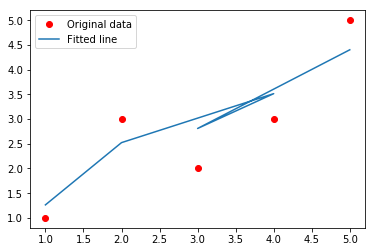

In [54]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: sess.run(x), Y: sess.run(y)})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: sess.run(train_X), Y:sess.run(train_Y)})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: sess.run(train_X), Y: sess.run(train_Y)})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(sess.run(train_X), sess.run(train_Y), 'ro', label='Original data')
    plt.plot(sess.run(train_X), sess.run(W) * sess.run(train_X) + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()